In [1]:
import findspark
findspark.init()

In [2]:
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
spark = SparkSession.builder.getOrCreate()
#spark.stop()

In [3]:
nba = spark.read.csv('Seasons_Stats.csv', header=True, inferSchema=True, nullValue='')

In [4]:
nba.show(5)

+---+----+---------------+---+---+---+---+----+----+----+-----+----+-----+----+----+----+----+----+----+----+----+-----+----+----+----+-----+------+----+----+----+----+---+---+-----+----+----+----+---+---+-----+-----+---+---+-----+----+----+----+---+----+----+----+---+---+
|_c0|Year|         Player|Pos|Age| Tm|  G|  GS|  MP| PER|  TS%|3PAr|  FTr|ORB%|DRB%|TRB%|AST%|STL%|BLK%|TOV%|USG%|blanl| OWS| DWS|  WS|WS/48|blank2|OBPM|DBPM| BPM|VORP| FG|FGA|  FG%|  3P| 3PA| 3P%| 2P|2PA|  2P%| eFG%| FT|FTA|  FT%| ORB| DRB| TRB|AST| STL| BLK| TOV| PF|PTS|
+---+----+---------------+---+---+---+---+----+----+----+-----+----+-----+----+----+----+----+----+----+----+----+-----+----+----+----+-----+------+----+----+----+----+---+---+-----+----+----+----+---+---+-----+-----+---+---+-----+----+----+----+---+----+----+----+---+---+
|  0|1950|Curly Armstrong|G-F| 31|FTW| 63|null|null|null|0.368|null|0.467|null|null|null|null|null|null|null|null| null|-0.1| 3.6| 3.5| null|  null|null|null|null|null|144|516|0.

In [5]:
players = spark.read.csv('player_data.csv', header=True, inferSchema=True, nullValue='')

In [6]:
players.show(5)

+-------------------+----------+--------+--------+------+------+----------------+--------------------+
|               name|year_start|year_end|position|height|weight|      birth_date|             college|
+-------------------+----------+--------+--------+------+------+----------------+--------------------+
|     Alaa Abdelnaby|      1991|    1995|     F-C|  6-10|   240|   June 24, 1968|     Duke University|
|    Zaid Abdul-Aziz|      1969|    1978|     C-F|   6-9|   235|   April 7, 1946|Iowa State Univer...|
|Kareem Abdul-Jabbar|      1970|    1989|       C|   7-2|   225|  April 16, 1947|University of Cal...|
| Mahmoud Abdul-Rauf|      1991|    2001|       G|   6-1|   162|   March 9, 1969|Louisiana State U...|
|  Tariq Abdul-Wahad|      1998|    2003|       F|   6-6|   223|November 3, 1974|San Jose State Un...|
+-------------------+----------+--------+--------+------+------+----------------+--------------------+
only showing top 5 rows



In [7]:
pl_data = spark.read.csv('Players.csv', header=True, inferSchema=True, nullValue='')

In [8]:
pl_data.show(5)

+---+---------------+------+------+--------------------+----+-----------+-----------+
|_c0|         Player|height|weight|             collage|born| birth_city|birth_state|
+---+---------------+------+------+--------------------+----+-----------+-----------+
|  0|Curly Armstrong|   180|    77|  Indiana University|1918|       null|       null|
|  1|   Cliff Barker|   188|    83|University of Ken...|1921|   Yorktown|    Indiana|
|  2|  Leo Barnhorst|   193|    86|University of Not...|1924|       null|       null|
|  3|     Ed Bartels|   196|    88|North Carolina St...|1925|       null|       null|
|  4|    Ralph Beard|   178|    79|University of Ken...|1927|Hardinsburg|   Kentucky|
+---+---------------+------+------+--------------------+----+-----------+-----------+
only showing top 5 rows



In [9]:
nba.count()

24691

### The best player's scorse in each season since 1980 

In [10]:
nba_scorers = nba.select('Player', 'Year', 'Pts').where(nba.Year >= 1980).orderBy('Pts', ascending = False).limit(10)
nba_sc_asc = nba_scorers.select('Player', 'Year', 'Pts').orderBy('Pts', ascending = True)

In [11]:
nba_sc_asc.show()

+-----------------+----+----+
|           Player|Year| Pts|
+-----------------+----+----+
|   George Gervin*|1982|2551|
|Russell Westbrook|2017|2558|
|  Michael Jordan*|1991|2580|
|   George Gervin*|1980|2585|
|     Kevin Durant|2014|2593|
|  Michael Jordan*|1989|2633|
|  Michael Jordan*|1990|2753|
|      Kobe Bryant|2006|2832|
|  Michael Jordan*|1988|2868|
|  Michael Jordan*|1987|3041|
+-----------------+----+----+



### Analyze the average number of 3 point attempts for each season in a time limit of 48 minutes (an interval corresponding to an approximate full NBA game)

In [12]:
nba = nba.where(nba.Year >= 1980)
suma_nba = nba.select('Year','3PA','MP').groupBy('Year').sum('3PA','MP')

In [13]:
suma_nba.show()

+----+--------+-------+
|Year|sum(3PA)|sum(MP)|
+----+--------+-------+
|1990|   15361| 571889|
|2003|   37101| 608151|
|2007|   44269| 630031|
|2015|   63420| 678196|
|2006|   42898| 646039|
|2013|   52958| 637705|
|1988|   10735| 507434|
|1997|   44011| 632501|
|1994|   23031| 568690|
|2014|   58438| 651866|
|2004|   39708| 653247|
|1991|   16587| 565462|
|1982|    4655| 490771|
|1989|   14496| 535650|
|1996|   41535| 637689|
|1998|   34026| 636844|
|1985|    6008| 466340|
|2012|   38277| 507163|
|1987|    9177| 476767|
|2009|   50535| 662148|
+----+--------+-------+
only showing top 20 rows



In [14]:
srednia3pa_nba = suma_nba.withColumn('Srednia_3PA', (col('sum(3PA)')/col('sum(MP)'))*48).orderBy('Year')

In [16]:
srednia3pa_nba.show()

+----+--------+-------+-------------------+
|Year|sum(3PA)|sum(MP)|        Srednia_3PA|
+----+--------+-------+-------------------+
|1980|    5522| 484812| 0.5467191406153313|
|1981|    4161| 484370|0.41234593389351115|
|1982|    4655| 490771| 0.4552836251530755|
|1983|    4592| 498741| 0.4419448170493302|
|1984|    4599| 465432|0.47429484865673177|
|1985|    6008| 466340|  0.618398593301025|
|1986|    6677| 476128| 0.6731299146448014|
|1987|    9177| 476767|  0.923923006416132|
|1988|   10735| 507434| 1.0154621093580642|
|1989|   14496| 535650| 1.2989974796975639|
|1990|   15361| 571889| 1.2892851584835519|
|1991|   16587| 565462| 1.4080097336337367|
|1992|   17433| 556538|  1.503552318080706|
|1993|   20384| 553795|  1.766776514775323|
|1994|   23031| 568690|  1.943920237739366|
|1995|   35874| 560989| 3.0694933412241596|
|1996|   41535| 637689|  3.126414286587976|
|1997|   44011| 632501| 3.3399599368222344|
|1998|   34026| 636844| 2.5645966673157004|
|1999|   20261| 370984|  2.62148

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [19]:
srednia3pa_plot = srednia3pa_nba.toPandas()[['Year', 'Srednia_3PA']]
srednia3pa_plot = srednia3pa_plot.set_index('Year')

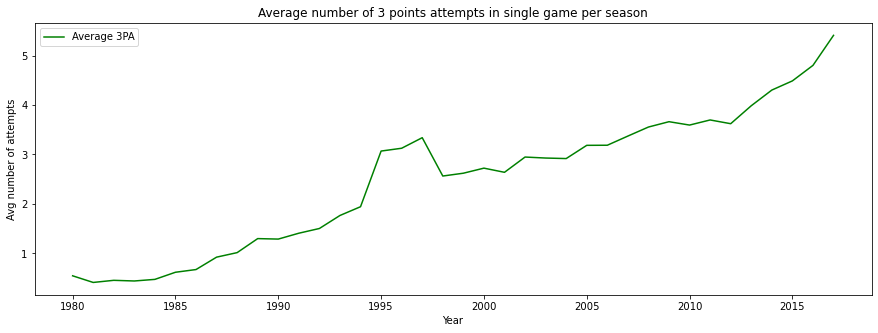

In [21]:
plt.figure(figsize = (15,5))
plt.plot(srednia3pa_plot['Srednia_3PA'], color='green')
plt.legend(['Average 3PA'])
plt.title('Average number of 3 points attempts in single game per season')
plt.xlabel('Year')
plt.ylabel('Avg number of attempts')
#fig.tight_layout(pad=3.0)
plt.show()

### Predict the average number of 3 point attempts for the next 5 years.

In [23]:
#transform data structure
from pyspark.ml.linalg import Vectors
ad_df = srednia3pa_nba.rdd.map(lambda x: [Vectors.dense(x[0]), x[-1]]).toDF(['Year', 'Srednia_3PA'])
ad_df.show(5)

+--------+-------------------+
|    Year|        Srednia_3PA|
+--------+-------------------+
|[1980.0]| 0.5467191406153313|
|[1981.0]|0.41234593389351115|
|[1982.0]| 0.4552836251530755|
|[1983.0]| 0.4419448170493302|
|[1984.0]|0.47429484865673177|
+--------+-------------------+
only showing top 5 rows



In [24]:
#build linear regression model
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'Year', labelCol = 'Srednia_3PA')

In [25]:
#fit the model
lr_model = lr.fit(ad_df)

In [26]:
#prediction
pred = lr_model.transform(ad_df)
pred.show(5)

+--------+-------------------+-------------------+
|    Year|        Srednia_3PA|         prediction|
+--------+-------------------+-------------------+
|[1980.0]| 0.5467191406153313|0.24999064938177185|
|[1981.0]|0.41234593389351115| 0.3709330583469068|
|[1982.0]| 0.4552836251530755| 0.4918754673120702|
|[1983.0]| 0.4419448170493302| 0.6128178762772052|
|[1984.0]|0.47429484865673177| 0.7337602852423686|
+--------+-------------------+-------------------+
only showing top 5 rows



In [27]:
#evaluation
from pyspark.ml.evaluation import RegressionEvaluator 
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='Srednia_3PA')
evaluator.setMetricName('r2').evaluate(pred)

0.9346627761641653

In [29]:
# predicting for 5 years ahead
next_years = spark.createDataFrame(pd.DataFrame({'Year' : range(2018,2023)}))
next_years_transformed = next_years.rdd.map(lambda x: [Vectors.dense(x[0])]).toDF(['Year'])
next_years_transformed.show()

+--------+
|    Year|
+--------+
|[2018.0]|
|[2019.0]|
|[2020.0]|
|[2021.0]|
|[2022.0]|
+--------+



In [30]:
next_years_prediction = lr_model.transform(next_years_transformed)
next_years_prediction.show()

+--------+------------------+
|    Year|        prediction|
+--------+------------------+
|[2018.0]| 4.845802190057526|
|[2019.0]| 4.966744599022661|
|[2020.0]|5.0876870079878245|
|[2021.0]|5.2086294169529594|
|[2022.0]| 5.329571825918123|
+--------+------------------+



In [31]:
past = pred.toPandas()
future = next_years_prediction.toPandas()

In [32]:
past['Year'] = [int(year[0]) for year in past['Year']]
future['Year'] = [int(year[0]) for year in future['Year']]

In [33]:
prediction = pd.concat([past[['Year','prediction']], future])

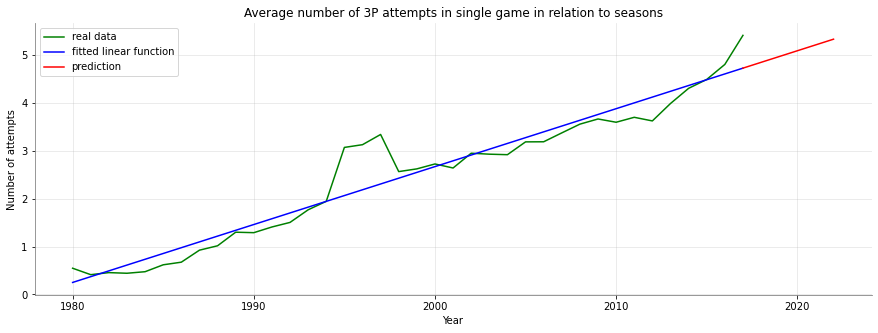

In [34]:
fig, ax = plt.subplots(1,1, figsize=(15, 5))
ax.plot(past['Year'], past['Srednia_3PA'], color='green')
ax.plot(past['Year'], prediction[:-5]['prediction'], color='blue')
ax.plot(prediction[-6:]['Year'], prediction[-6:]['prediction'], color='red')
ax.legend(['real data','fitted linear function','prediction'])
ax.set_title('Average number of 3P attempts in single game in relation to seasons')
ax.set_xlabel('Year')
ax.set_ylabel('Number of attempts')
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color(None)
ax.spines['left'].set_color('0.5')
ax.spines['right'].set_color(None)
ax.grid(alpha=0.3)
#fig.tight_layout(pad=3.0)
plt.show()